# Google Brain Ventilator Pressure - EDA

In [177]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Mounting

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
cd drive/MyDrive/Kaggle/Google Brain Ventilator Pressure/ventilator-pressure

/content/drive/MyDrive/Kaggle/Google Brain Ventilator Pressure/ventilator-pressure


## Load Data

In [67]:
df_train = pd.read_csv('data/train.csv', index_col=0)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## EDA

In [155]:
def plot_breath_id(df, breath_ids, fig_size): 

  fig, ax1 = plt.subplots(len(breath_ids), 1)

  fig.set_figwidth(fig_size[0])  
  fig.set_figheight(fig_size[1])
  
  for i, breath_id in enumerate(breath_ids):
    df_temp = df[df['breath_id'] == breath_id]

    ax1[i].set_xlabel('time_step [s]')
    ax1[i].set_ylabel('pressure / inspiratory solenoid valve')
    ax1[i].set_title(f'Breath ID: {breath_id}  /  R={df_temp["R"].iloc[0]} , C={df_temp["C"].iloc[0]}')

    u_in_plot = ax1[i].plot(df_temp['time_step'], df_temp['u_in'], color='blue')
    pressure_plt = ax1[i].plot(df_temp['time_step'], df_temp['pressure'], color='orange')

    ax2 = ax1[i].twinx()

    ax2.set_ylabel('exploratory solenoid valve')
    u_out_plot = ax2.plot(df_temp['time_step'], df_temp['u_out'], color='red')

    legend_ax1 = ax1[i].legend(['u_in', 'pressure'], loc=2)
    legend_ax2 = ax2.legend(['u_out'], loc=1)
  
  plt.tight_layout(pad=5)

#### Exploring the dataframe

Table Head

In [68]:
df_train.head()

,breath_id,R,C,time_step,u_in,u_out,pressure
id,,,,,,,
1,1,20,50,0.000000,0.083334,0,5.837492
2,1,20,50,0.033652,18.383041,0,5.907794
3,1,20,50,0.067514,22.509278,0,7.876254
4,1,20,50,0.101542,22.808822,0,11.742872
5,1,20,50,0.135756,25.355850,0,12.234987


Table Shape

In [35]:
df_train.shape

(6036000, 8)

First Breath Cycle with the exploratory valve closed

In [69]:
df_train[(df_train['breath_id'] == 1) & (df_train['u_out'] == 0)]

,breath_id,R,C,time_step,u_in,u_out,pressure
id,,,,,,,
1,1,20,50,0.000000,0.083334,0,5.837492
2,1,20,50,0.033652,18.383041,0,5.907794
3,1,20,50,0.067514,22.509278,0,7.876254
4,1,20,50,0.101542,22.808822,0,11.742872
5,1,20,50,0.135756,25.355850,0,12.234987
6,1,20,50,0.169698,27.259866,0,12.867706
7,1,20,50,0.203708,27.127486,0,14.695562
8,1,20,50,0.237723,26.807732,0,15.890699
9,1,20,50,0.271776,27.864715,0,15.539188


First Breath Cycle with the exploratory valve opened

In [70]:
df_train[(df_train['breath_id'] == 1) & (df_train['u_out'] == 1)]

,breath_id,R,C,time_step,u_in,u_out,pressure
id,,,,,,,
31,1,20,50,1.021298,0.000000,1,19.546410
32,1,20,50,1.055426,0.000000,1,17.015533
33,1,20,50,1.089404,0.000000,1,9.563505
34,1,20,50,1.123387,0.000000,1,7.876254
35,1,20,50,1.157591,0.000000,1,8.649578
36,1,20,50,1.191510,0.000000,1,7.595045
37,1,20,50,1.225571,0.000000,1,7.665347
38,1,20,50,1.259531,0.000000,1,8.298067
39,1,20,50,1.293622,0.000000,1,7.243535


#### Plotting the first 5 breath_ids

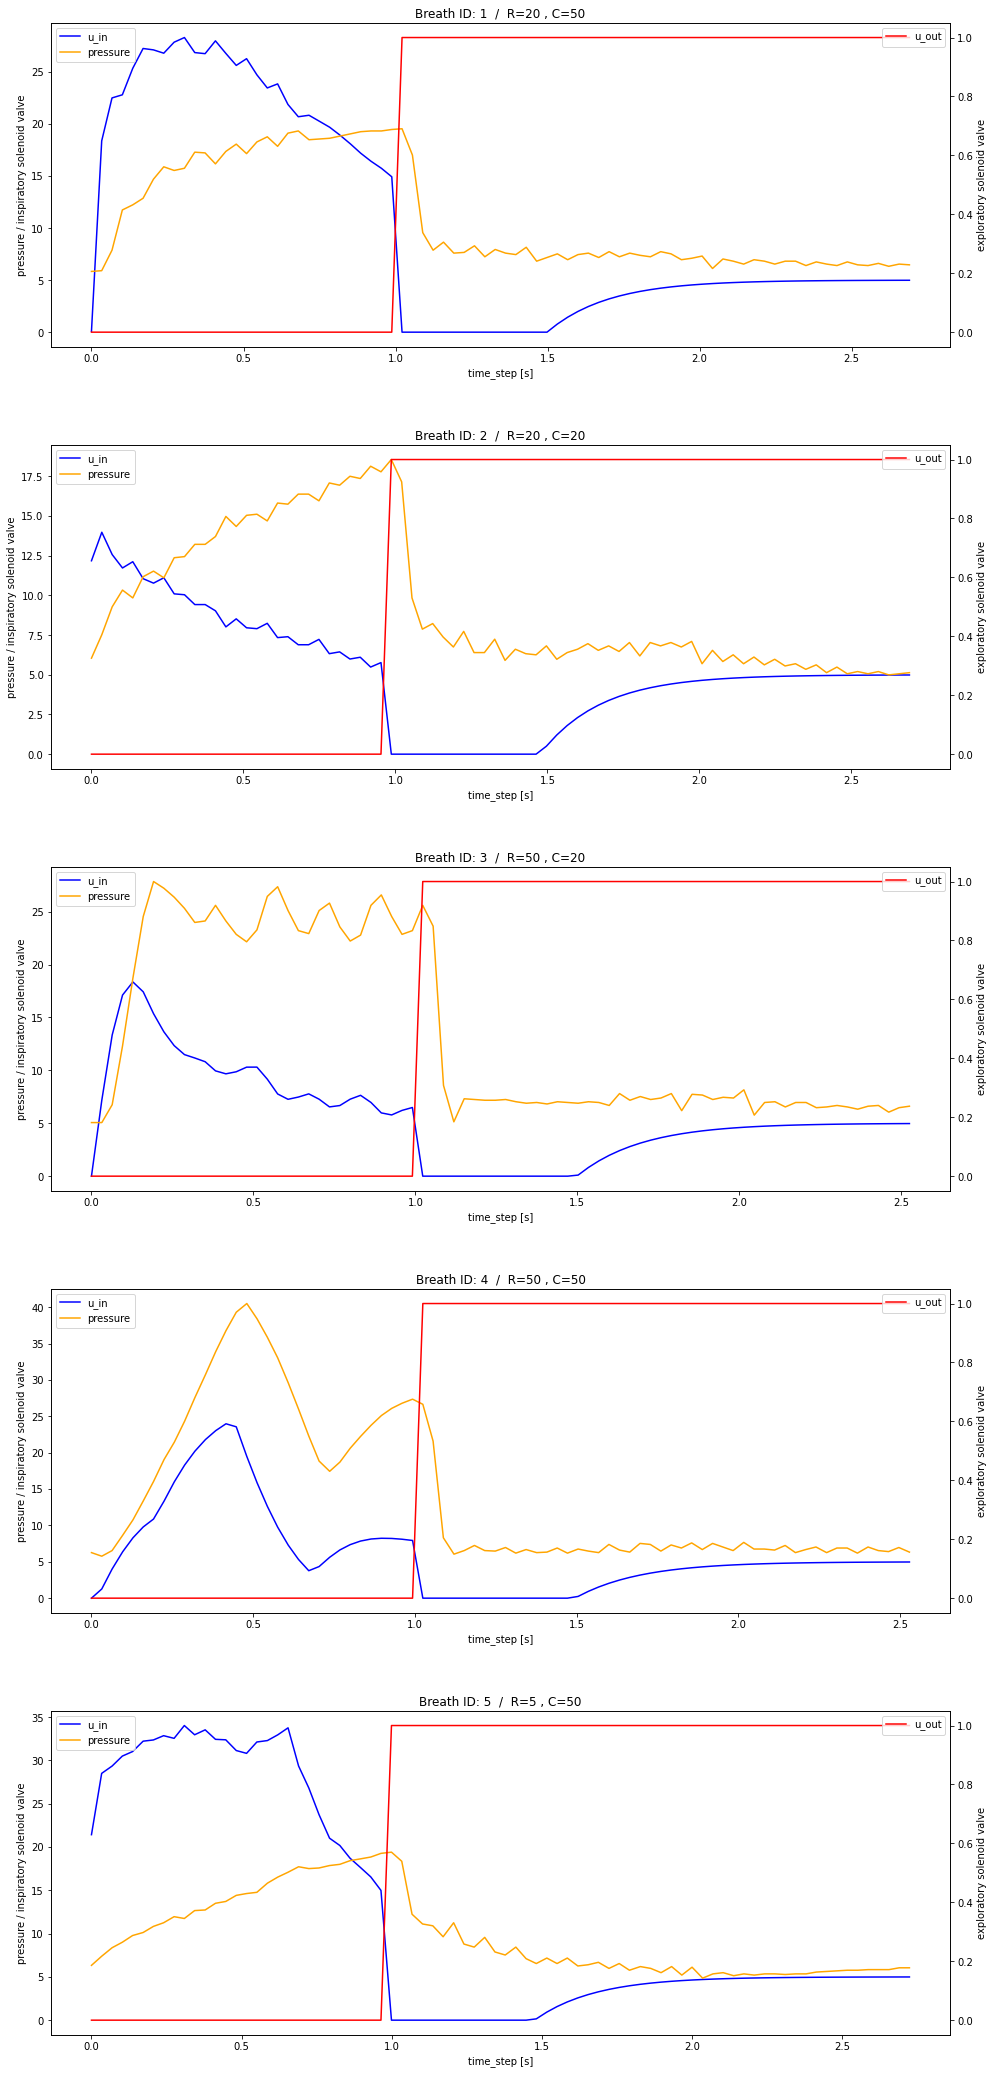

In [156]:
plot_breath_id(df_train, breath_ids=list(range(1,6)), fig_size=(15,30))

#### Data Types

In [41]:
df_train.dtypes

id             int64
breath_id      int64
R              int64
C              int64
time_step    float64
u_in         float64
u_out          int64
pressure     float64
dtype: object

#### Missing Values

In [202]:
df_train.isna().sum()

breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
pressure     0
dtype: int64

#### ID Check

The id is unique for every sample

In [36]:
len(df_train.id.unique())

6036000

#### Breath ID Check

There are 75450 unique breath sequences

In [37]:
len(df_train.breath_id.unique())

75450

#### ID's for earch Breath ID

There are 80 time_steps for each unique breath_id

In [38]:
len(df_train.id.unique())/len(df_train.breath_id.unique())

80.0

In [182]:
df_train.groupby('breath_id').apply(len).unique()

array([80])

#### Unique R

In [39]:
df_train.R.unique()

array([20, 50,  5])

#### Unique C

In [40]:
df_train.C.unique()

array([50, 20, 10])

#### Time Step

Max Breath Duration

In [43]:
df_train.time_step.max()

2.9372379779815674

Min Breath Duration

In [56]:
df_train.groupby('breath_id')['time_step'].max().min()

2.4968085289001465

Avg Breath Id Duration

In [51]:
df_train.groupby('breath_id')['time_step'].max().mean()

2.614802905968122

#### U Out

The exploratory valve is either closed or open

In [57]:
df_train['u_out'].unique()

array([0, 1])

Valve Opening Time

Minimum time passed after opening the exploratory valve

In [195]:
df_train.groupby(['breath_id', 'u_out'])['time_step'].max()[:,0].min()

0.790935754776001

Average time passed after opening the exploratory valve

In [200]:
df_train.groupby(['breath_id', 'u_out'])['time_step'].max()[:,0].mean()

0.9704688441792887

Maximum time passed after opening the exploratory valve

In [196]:
df_train.groupby(['breath_id', 'u_out'])['time_step'].max()[:,0].max()

0.999798059463501

Standard deviation of time passed after opening the exploratory valve

In [199]:
df_train.groupby(['breath_id', 'u_out'])['time_step'].max()[:,0].std()

0.013128155334718894

Most of the time the exploratory valve is opened after about 0.97s with a std of only 0.013s.

The exploratory valve is always opened before 1s has passed. (possibly 1s is the maximum for safety reasons)

#### U_In

The inspiratory valve can be controlled in the range from 0 to 100

In [61]:
df_train['u_in'].max()

100.0

In [62]:
df_train['u_in'].min()

0.0

#### Avg Max U_In

Average max pressure during one breath id

In [63]:
df_train.groupby('breath_id')['u_in'].max().mean()

36.02007852262987

### R and C pressure distribution

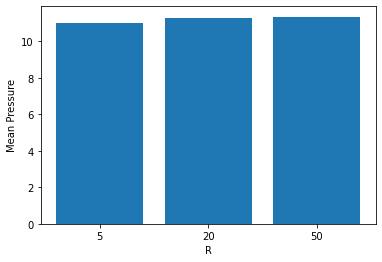

In [169]:
r_mean_pressure = df_train.groupby('R')['pressure'].mean()
bar_plt = plt.bar(r_mean_pressure.index.astype(str), r_mean_pressure.values)
x_label = plt.xlabel('R')
y_label = plt.ylabel('Mean Pressure')

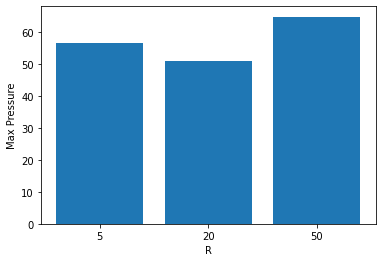

In [170]:
r_max_pressure = df_train.groupby('R')['pressure'].max()
bar_plt = plt.bar(r_max_pressure.index.astype(str), r_max_pressure.values)
x_label = plt.xlabel('R')
y_label = plt.ylabel('Max Pressure')

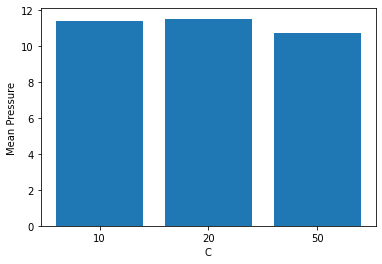

In [171]:
c_mean_pressure = df_train.groupby('C')['pressure'].mean()
bar_plt = plt.bar(c_mean_pressure.index.astype(str), c_mean_pressure.values)
x_label = plt.xlabel('C')
y_label = plt.ylabel('Mean Pressure')

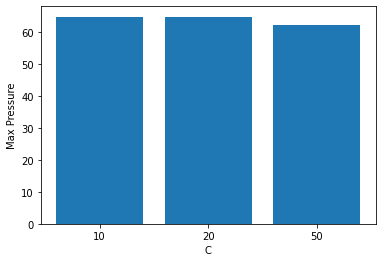

In [172]:
c_max_pressure = df_train.groupby('C')['pressure'].max()
bar_plt = plt.bar(c_max_pressure.index.astype(str), c_max_pressure.values)
x_label = plt.xlabel('C')
y_label = plt.ylabel('Max Pressure')

The mean pressure for all C and R values is almost evenly distributed

### C and R u_in distribution

Mean u_in for unique R's

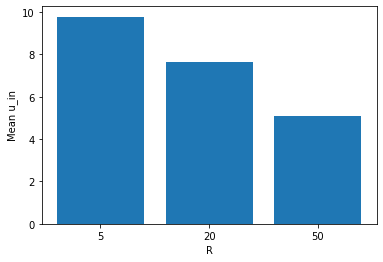

In [173]:
r_mean_u_in = df_train.groupby('R')['u_in'].mean()
bar_plt = plt.bar(r_mean_u_in.index.astype(str), r_mean_u_in.values)
x_label = plt.xlabel('R')
y_label = plt.ylabel('Mean u_in')

Mean u_in for unique C's

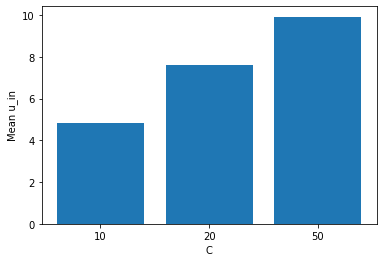

In [175]:
c_mean_u_in = df_train.groupby('C')['u_in'].mean()
bar_plt = plt.bar(c_mean_u_in.index.astype(str), c_mean_u_in.values)
x_label = plt.xlabel('C')
y_label = plt.ylabel('Mean u_in')

R and C are widely diffrent in correlation with the inspiratory valve controll

### Correlation

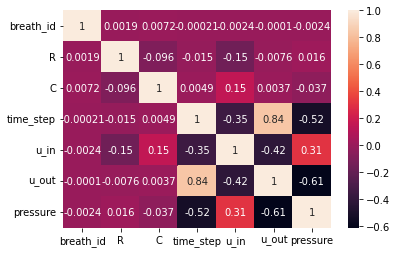

In [179]:
sns.heatmap(df_train.corr(), annot=True)

The correlation matrix indicates the same insight that was gained in the part above.

The lung specific parameters (`R and C`) dont have a direct impact on the `pressure`, but they have a fairly strong correlation with the inspiratory valve controll. And `u_in` has the single most positiv correlation with the `pressure`. 

Since we noticed that the exploratory valve opens almost always a little before one seccond has passed, it's no suprise that there is a strong correlation between the `time_step` and `u_out`. Hence there is also a strong negative correlation between the `pressure` and the `time_step`.